# Turtle Rescue Forecast Challenge


* Link:
[Turtle Rescue Forecast Challenge](https://zindi.africa/competitions/turtle-rescue-forecast-challenge/data)

* Objective: The objective of this challenge is to forecast the number of turtles caught per week per capture site. This will help Local Ocean plan their staff schedules and budget.

Actions to take:

| Column                | Non-null Count | Data Type | Description                                                                                                   |
|-----------------------|----------------|-----------|---------------------------------------------------------------------------------------------------------------|
| Rescue_ID             | 18062          | Object    | Non-numerical. Probably not needed.               |
| Date_TimeCaught       | 18062          | Object    | Date time format. Changed to date format. No missing values. Skewed to the right. (Done)|
| Researcher            | 18062          | Object    | Non-numerical. More than 20 researchers. Probably not needed.     |
| CaptureSite           | 18062          | Object    | Categorical. Inbalanced. High correlation. Many from 'other values'. Probably drop 'other values'. Normalize |
| ForagingGround        | 18062          | Object    | Categorical. High correlation. Inbalanced. Many more from Creek. Normalize   |
| CaptureMethod         | 18062          | Object    | Categorical. Inbalanced. Many more from 'net'. Probably not needed.    |
| Fisher                | 18062          | Object    | Categorical. Probably not needed.           |
| LandingSite           | 18062          | Object    | Categorical. High correlation. Many more of '8469'. Inbalanced.  |
| Species               | 18062          | Object    | Categorical. Inbalanced. More of type 5. Probably not needed.                                              |
| Tag_1                 | 17937          | Object    | Non-numerical. Not needed.          |
| Tag_2                 | 4911           | Object    | Categorical. Missing values.        |
| Lost_Tags             | 925            | Object    | Non-numerical. Missing values (?)   |
| T_Number              | 38             | Object    |         |
| CCL_cm                | 18038          | Float64   |         |
| CCW_cm                | 18035          | Float64   |         |
| Weight_Kg             | 12653          | Float64   |         |
| Sex                   | 13732          | Object    |         |
| TurtleCharacteristics | 18010          | Object    |         |
| Status                | 14429          | Object    |         |
| ReleaseSite           | 17987          | Object    |         |
| Date_TimeRelease      | 11954          | Object    |         |


## Set-up and Import

Terminal: 
'make setup'

In [503]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from ydata_profiling import ProfileReport

import missingno as msno

from datetime import datetime as dt

import matplotlib.pyplot as plt




In [504]:
# pip install missingno

In [505]:
# pip install ydata-profiling --upgrade

### Table 1

Is the category of the capture site. Categories are defined by sites that are geographically near each other. Type is a masked characteristic of the capture site.

In [506]:
# Turtles dataset - CaptureSite_category.csv
df_capturesite_category = pd.read_csv('./data/CaptureSite_category.csv')
df_capturesite_category.head()

,CaptureSite,CaptureSiteCategory,Type
0,CaptureSite_0,CaptureSiteCategory_2,Type_1
1,CaptureSite_1,CaptureSiteCategory_2,Type_1
2,CaptureSite_10,CaptureSiteCategory_2,Type_1
3,CaptureSite_11,CaptureSiteCategory_0,Type_0
4,CaptureSite_12,CaptureSiteCategory_2,Type_1


In [507]:
# Different categories of CaptureSite
df_capturesite_category['CaptureSite'].unique()


array(['CaptureSite_0', 'CaptureSite_1', 'CaptureSite_10',
       'CaptureSite_11', 'CaptureSite_12', 'CaptureSite_13',
       'CaptureSite_14', 'CaptureSite_15', 'CaptureSite_16',
       'CaptureSite_17', 'CaptureSite_18', 'CaptureSite_19',
       'CaptureSite_2', 'CaptureSite_20', 'CaptureSite_21',
       'CaptureSite_22', 'CaptureSite_23', 'CaptureSite_24',
       'CaptureSite_25', 'CaptureSite_26', 'CaptureSite_27',
       'CaptureSite_28', 'CaptureSite_3', 'CaptureSite_4',
       'CaptureSite_5', 'CaptureSite_6', 'CaptureSite_7', 'CaptureSite_8',
       'CaptureSite_9'], dtype=object)

In [508]:
print('Classification of CaptureSite categories: ', len(df_capturesite_category['CaptureSite'].unique()))


Classification of CaptureSite categories:  29


In [509]:
df_capturesite_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CaptureSite          29 non-null     object
 1   CaptureSiteCategory  29 non-null     object
 2   Type                 29 non-null     object
dtypes: object(3)
memory usage: 828.0+ bytes


### Table 2

Is an example of what your submission file should look like. The order of the rows does not matter, but the IDs must all be present and correctly formatted. The IDs are formatted as "CaptureSite"_<CaptureSite ID number>_<year><week number>, e.g. CaptureSite_0_201901 is the capture site with ID number 0 in the first week of 2019 (1-6 January 2019).

In [510]:
# Turtles dataset - Sample_sub.csv
df_sample_sub = pd.read_csv('./data/Sample_sub.csv')
df_sample_sub.head()

,ID,Capture_Number
0,CaptureSite_0_201901,7
1,CaptureSite_0_201902,1
2,CaptureSite_0_201903,5
3,CaptureSite_0_201904,2
4,CaptureSite_0_201905,3


In [511]:
# Getting week of year  and captureSite from ID
df_sample_sub["year_woy"]=(df_sample_sub.ID.apply(lambda x: x.split("_")[-1])).astype(int) # Extract year_woy from ID
df_sample_sub["CaptureSite"]=df_sample_sub.ID.apply(lambda x: ("_").join(x.split("_")[0:-1]))
df_sample_sub.head()

,ID,Capture_Number,year_woy,CaptureSite
0,CaptureSite_0_201901,7,201901,CaptureSite_0
1,CaptureSite_0_201902,1,201902,CaptureSite_0
2,CaptureSite_0_201903,5,201903,CaptureSite_0
3,CaptureSite_0_201904,2,201904,CaptureSite_0
4,CaptureSite_0_201905,3,201905,CaptureSite_0


In [512]:
df_sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              1276 non-null   object
 1   Capture_Number  1276 non-null   int64 
 2   year_woy        1276 non-null   int64 
 3   CaptureSite     1276 non-null   object
dtypes: int64(2), object(2)
memory usage: 40.0+ KB


### Table 3

Is the dataset that you will use to train your model. This provides the detail of every sea turtle rescue

In [513]:
# Turtles dataset - train.csv
df_train = pd.read_csv('./data/train.csv')
df_train.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,08/08/02


In [514]:
df_train.tail()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
18057,2018_RE_1511,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_569,LandingSite_CaptureSiteCategory_1,Species_5,KES1828,...,NaN,NaN,57.13,50.57,21.09,Unknown,White calcareous algae on carapace,Released,ReleaseSite_68,18/12/18
18058,2018_RE_1514,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_125,LandingSite_CaptureSiteCategory_1,Species_6,KES0563,...,KES0416,NaN,42.07,38.37,9.02,Unknown,Calcareous + green algae on carapace\nBarnacle...,Released,ReleaseSite_68,18/12/18
18059,2018_RE_1532,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1343,LandingSite_CaptureSiteCategory_1,Species_5,KES1833,...,NaN,NaN,57.20,52.30,NaN,Unknown,Clean turtle,Released,ReleaseSite_68,24/12/18
18060,2018_RE_1533,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1551,LandingSite_CaptureSiteCategory_1,Species_5,KES1831,...,NaN,NaN,51.90,48.50,NaN,Unknown,Green algae on carapace\ntip of left supra mis...,Released,ReleaseSite_68,24/12/18
18061,2018_RE_1550,2018-12-28,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1551,LandingSite_CaptureSiteCategory_1,Species_6,KES1432,...,NaN,NaN,34.60,31.20,4.29,Unknown,Thick pink patches of calcareous algae on cara...,Released,ReleaseSite_37,28/12/18


## Preprocessing

### Transform date and time

In [515]:
# Create a copy of the original dataset
df_train_date = df_train.copy()

# Transform 'Date_TimeRelease' column to string format
df_train_date['Date_TimeRelease'] = df_train_date['Date_TimeRelease'].astype(str)

# Replace / on date columns 
df_train_date['Date_TimeRelease'] = df_train_date['Date_TimeRelease'].str.replace('/', '-')

# Add '20' in years with 2 digits
for i in range(len(df_train_date['Date_TimeRelease'])):
    d = df_train_date['Date_TimeRelease'][i]
    df_train_date['Date_TimeRelease'][i] = df_train_date['Date_TimeRelease'][i].replace(d, '20'+d)

In [516]:
df_train_date['Date_TimeRelease'].isnull().sum()

0

In [517]:
# Transform 'Date_TimeCaught' column to datetime format
df_train_date['Date_TimeCaught'] = pd.to_datetime(df_train_date['Date_TimeCaught'])
df_train_date["year"]=df_train_date.Date_TimeCaught.dt.year
df_train_date["week_of_year"] = df_train_date.Date_TimeCaught.dt.isocalendar().week # original changed to isocalendar
df_train_date["year_woy"]=df_train_date.year*100+df_train_date.week_of_year
df_train_date.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,2022-12-00,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,2028-10-01,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,2001-11-01,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,2011-03-02,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,2008-08-02,2002,32,200232


CHATGPT: The error you're encountering is due to the usage of the attribute weekofyear on the DatetimeProperties object. In newer versions of pandas (starting from version 1.1.0), the attribute name has been changed from weekofyear to week. 
It looks like the attribute name for extracting the week of the year is not week, and I made an incorrect suggestion. Instead, you should use dt.isocalendar().week to extract the week of the year. 

### Checking missing values 

In [518]:
df_train_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rescue_ID              18062 non-null  object        
 1   Date_TimeCaught        18062 non-null  datetime64[ns]
 2   Researcher             18062 non-null  object        
 3   CaptureSite            18062 non-null  object        
 4   ForagingGround         18062 non-null  object        
 5   CaptureMethod          18062 non-null  object        
 6   Fisher                 18062 non-null  object        
 7   LandingSite            18062 non-null  object        
 8   Species                18062 non-null  object        
 9   Tag_1                  17937 non-null  object        
 10  Tag_2                  4911 non-null   object        
 11  Lost_Tags              925 non-null    object        
 12  T_Number               38 non-null     object        
 13  C

<Axes: >

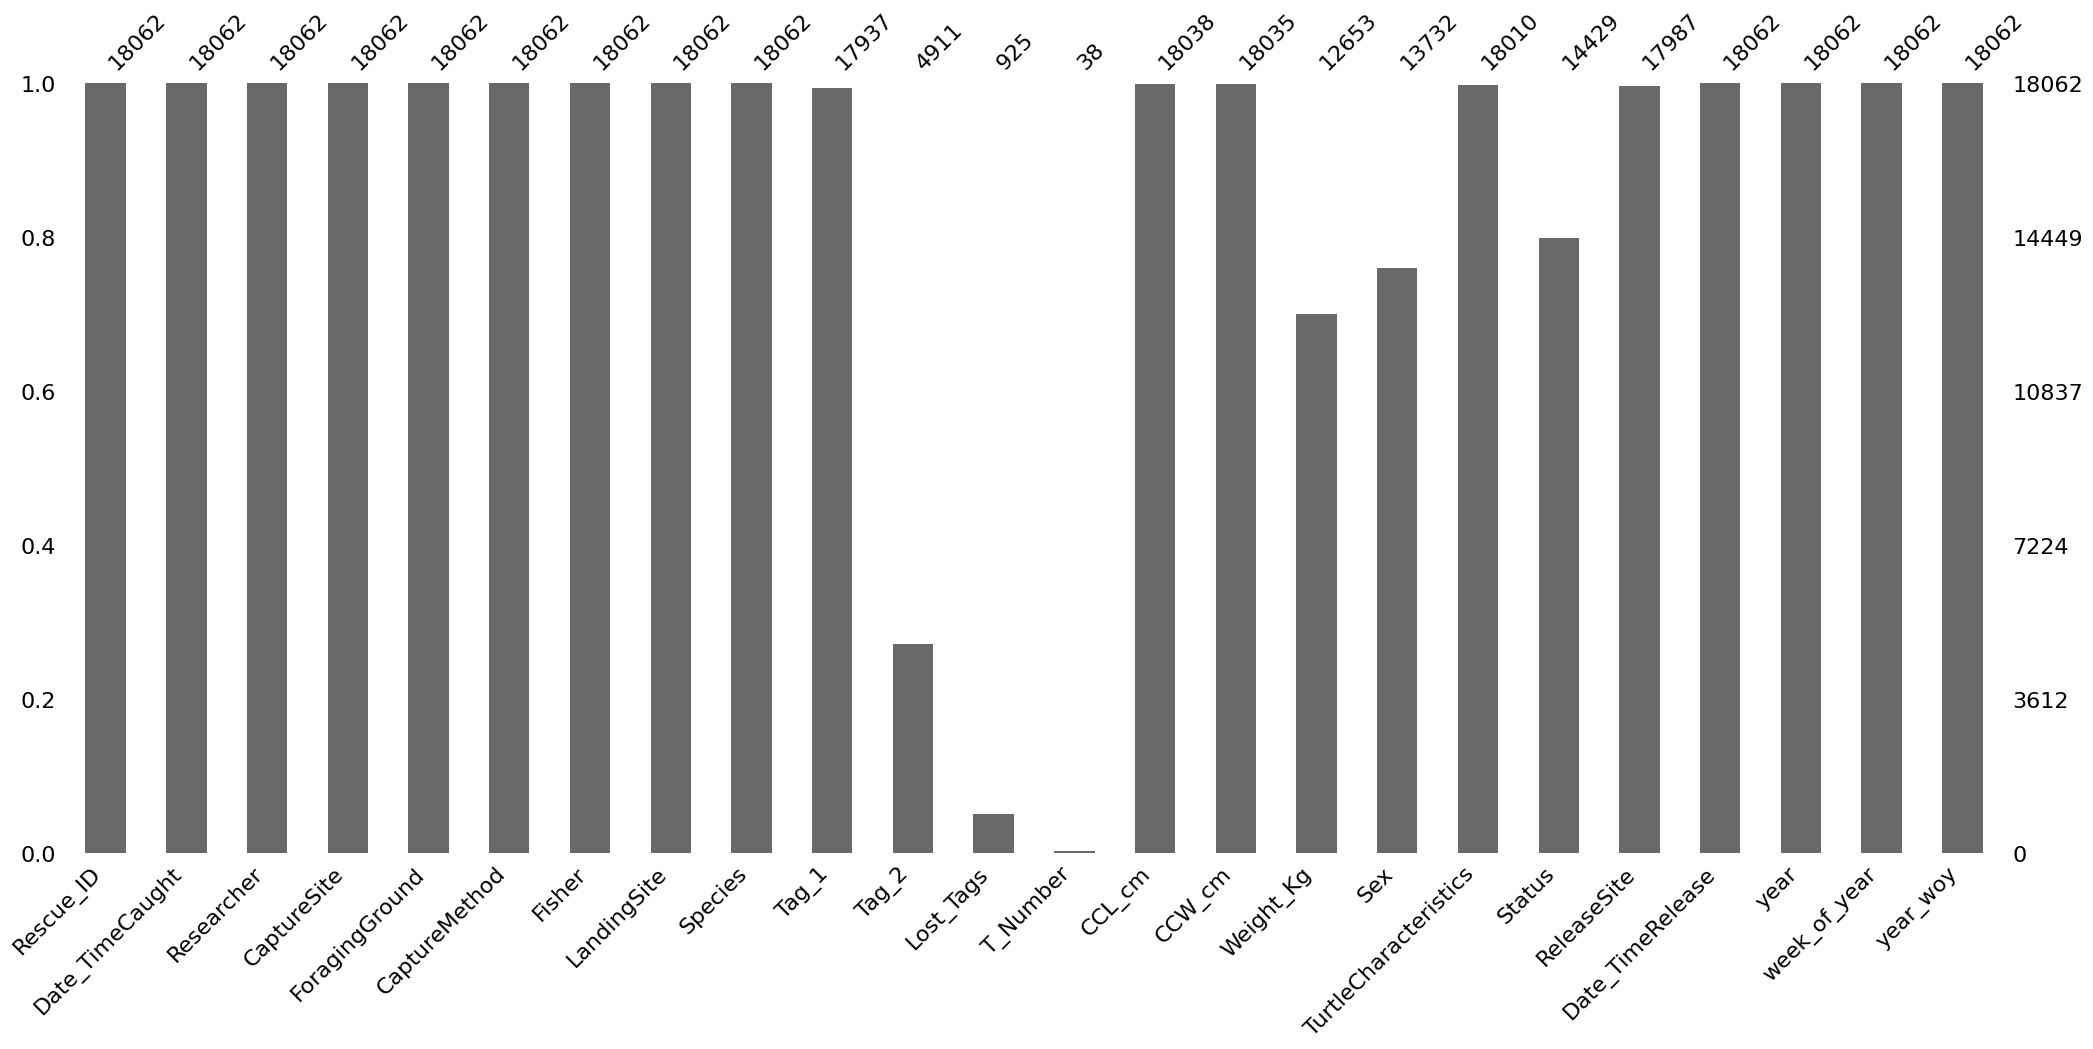

In [519]:
# Plotting percentage of missing values per column
msno.bar(df_train_date)

<Axes: >

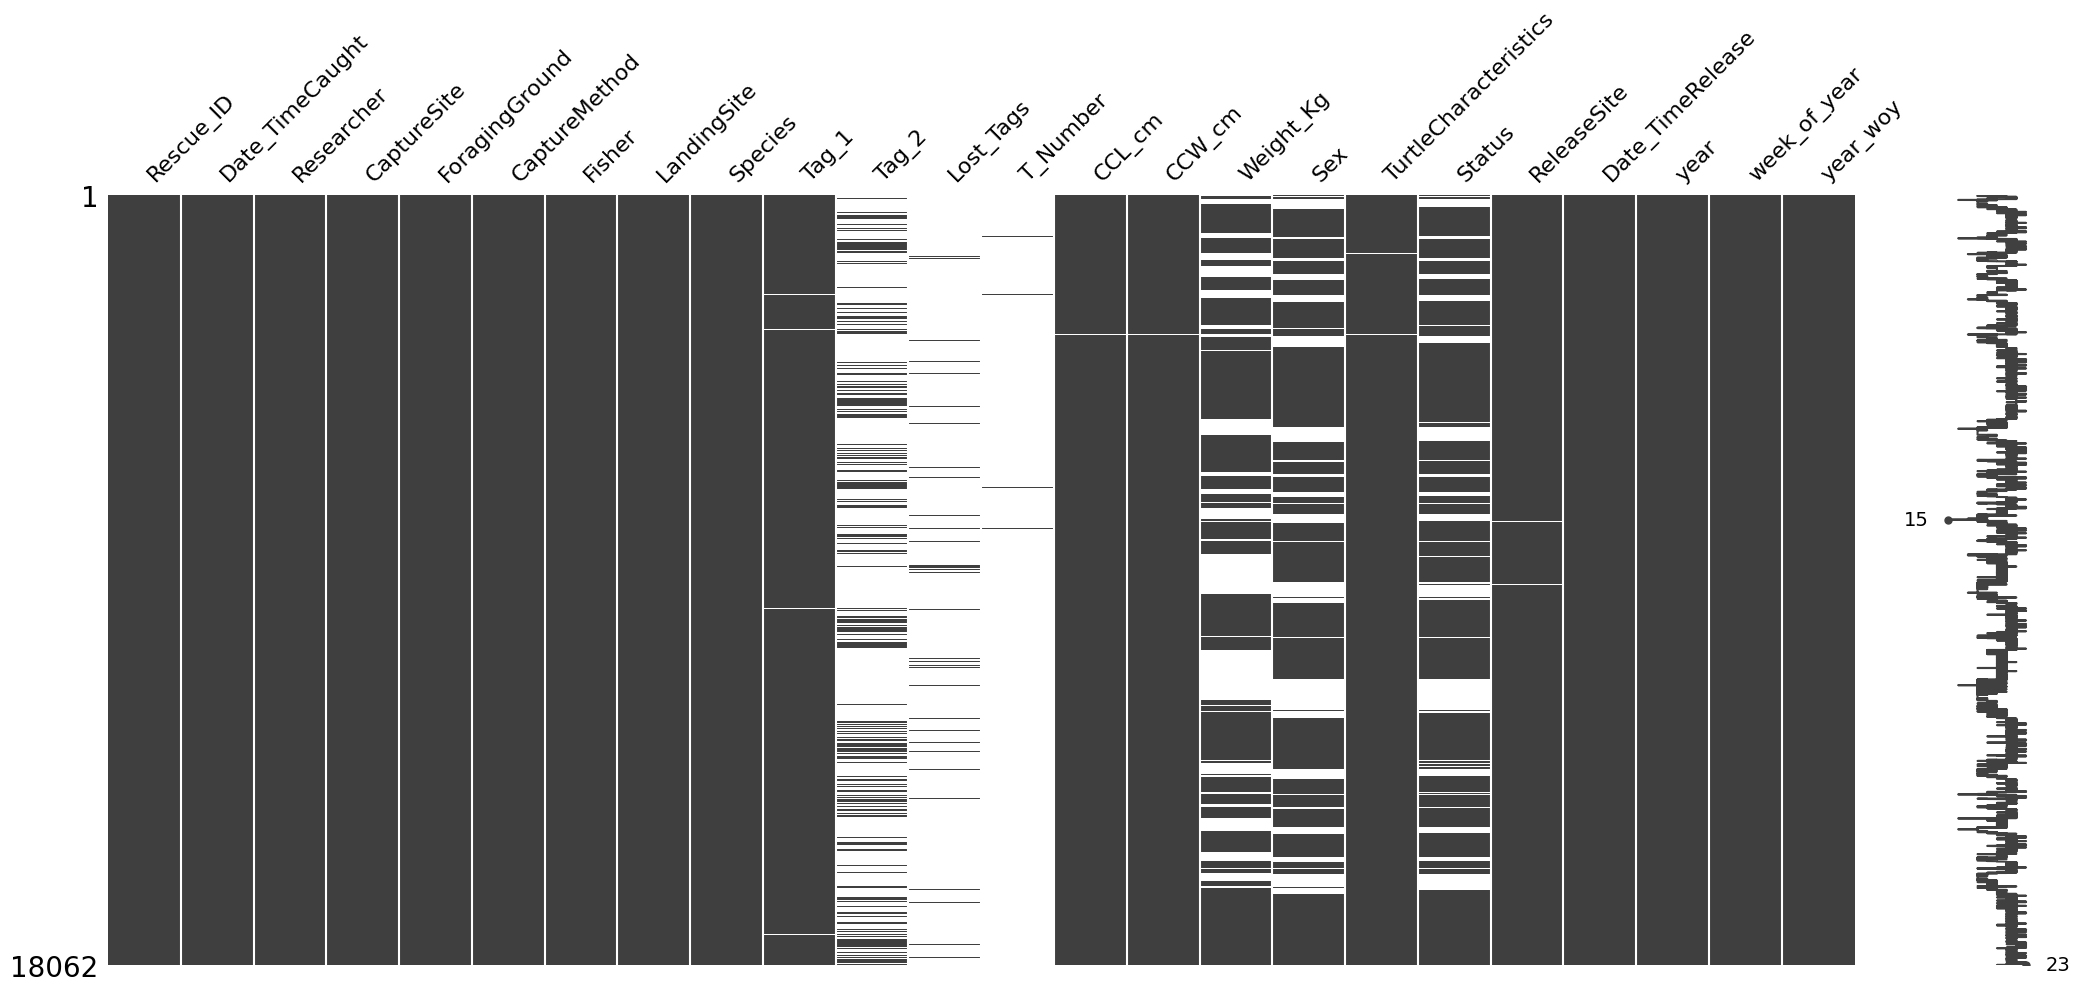

In [520]:
msno.matrix(df_train_date)

In [521]:
df_train_date.isna().sum()

Rescue_ID                    0
Date_TimeCaught              0
Researcher                   0
CaptureSite                  0
ForagingGround               0
CaptureMethod                0
Fisher                       0
LandingSite                  0
Species                      0
Tag_1                      125
Tag_2                    13151
Lost_Tags                17137
T_Number                 18024
CCL_cm                      24
CCW_cm                      27
Weight_Kg                 5409
Sex                       4330
TurtleCharacteristics       52
Status                    3633
ReleaseSite                 75
Date_TimeRelease             0
year                         0
week_of_year                 0
year_woy                     0
dtype: int64

### Check for duplicates

In [522]:
# Check for duplicates
df_train_date.duplicated().any(), df_capturesite_category.duplicated().any()

(False, False)

### Profile Report

In [523]:
# make a profile report of all data
#profile = ProfileReport(df_train, minimal=False)
#profile.to_file("./data/output.html")

### Merging tables


In [524]:
df_train_date.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,2022-12-00,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,2028-10-01,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,2001-11-01,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,2011-03-02,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,2008-08-02,2002,32,200232


In [525]:
df_train_date.shape

(18062, 24)

In [526]:
df_capturesite_category.head()

,CaptureSite,CaptureSiteCategory,Type
0,CaptureSite_0,CaptureSiteCategory_2,Type_1
1,CaptureSite_1,CaptureSiteCategory_2,Type_1
2,CaptureSite_10,CaptureSiteCategory_2,Type_1
3,CaptureSite_11,CaptureSiteCategory_0,Type_0
4,CaptureSite_12,CaptureSiteCategory_2,Type_1


In [527]:
df_capturesite_category.shape

(29, 3)

In [528]:
# See relationship between weeks of year and number of turtles captured

In [529]:
df_train_date.shape

(18062, 24)

In [530]:
df_train_date.head()

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease,year,week_of_year,year_woy
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,2022-12-00,2000,51,200051
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,31.35,NaN,Unknown,multiple b's on front flippers& a lot of alga...,Released,ReleaseSite_62,2028-10-01,2001,43,200143
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,2001-11-01,2001,44,200144
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell...,Released,ReleaseSite_50,2011-03-02,2002,11,200211
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,33.00,NaN,Unknown,very lively+ right eye is hanging out + swolle...,Released,ReleaseSite_62,2008-08-02,2002,32,200232


In [531]:
df_sample_sub.shape

(1276, 4)

In [532]:
df_sample_sub.head()

,ID,Capture_Number,year_woy,CaptureSite
0,CaptureSite_0_201901,7,201901,CaptureSite_0
1,CaptureSite_0_201902,1,201902,CaptureSite_0
2,CaptureSite_0_201903,5,201903,CaptureSite_0
3,CaptureSite_0_201904,2,201904,CaptureSite_0
4,CaptureSite_0_201905,3,201905,CaptureSite_0


In [533]:
df_sample_sub['CaptureSite'].nunique()

29

In [534]:
df_sample_sub.shape

(1276, 4)

In [535]:
# Concatinating week oy year and capture site in the training dataset to the submission dataset
# Grouping the data by capture site and taking the minimum week of year
keys=pd.concat([df_train_date[["year_woy","CaptureSite"]],df_sample_sub[["year_woy","CaptureSite"]]]) # Concatenate the dataframes: df_sample_sub and df_train_date in the dataframe keys, which will be used to group the data by CaptureSite
keys.sort_values(["CaptureSite","year_woy"],inplace=True)
CaptureSite_min_year_woy=keys.groupby("CaptureSite").year_woy.min().rename("year_woy").reset_index() # Group the data by CaptureSite and take the minimum year_woy, why minimum? because we want to predict the first week of the year for each CaptureSite
CaptureSite_min_year_woy.head()

# why the min? order of the weeks of the year is important

,CaptureSite,year_woy
0,CaptureSite_0,200051
1,CaptureSite_1,200123
2,CaptureSite_10,200050
3,CaptureSite_11,199828
4,CaptureSite_12,200107


In [536]:
CaptureSite_min_year_woy.shape

(29, 2)

In [537]:
CaptureSite_min_year_woy.isnull().sum()

CaptureSite    0
year_woy       0
dtype: int64

<Axes: >

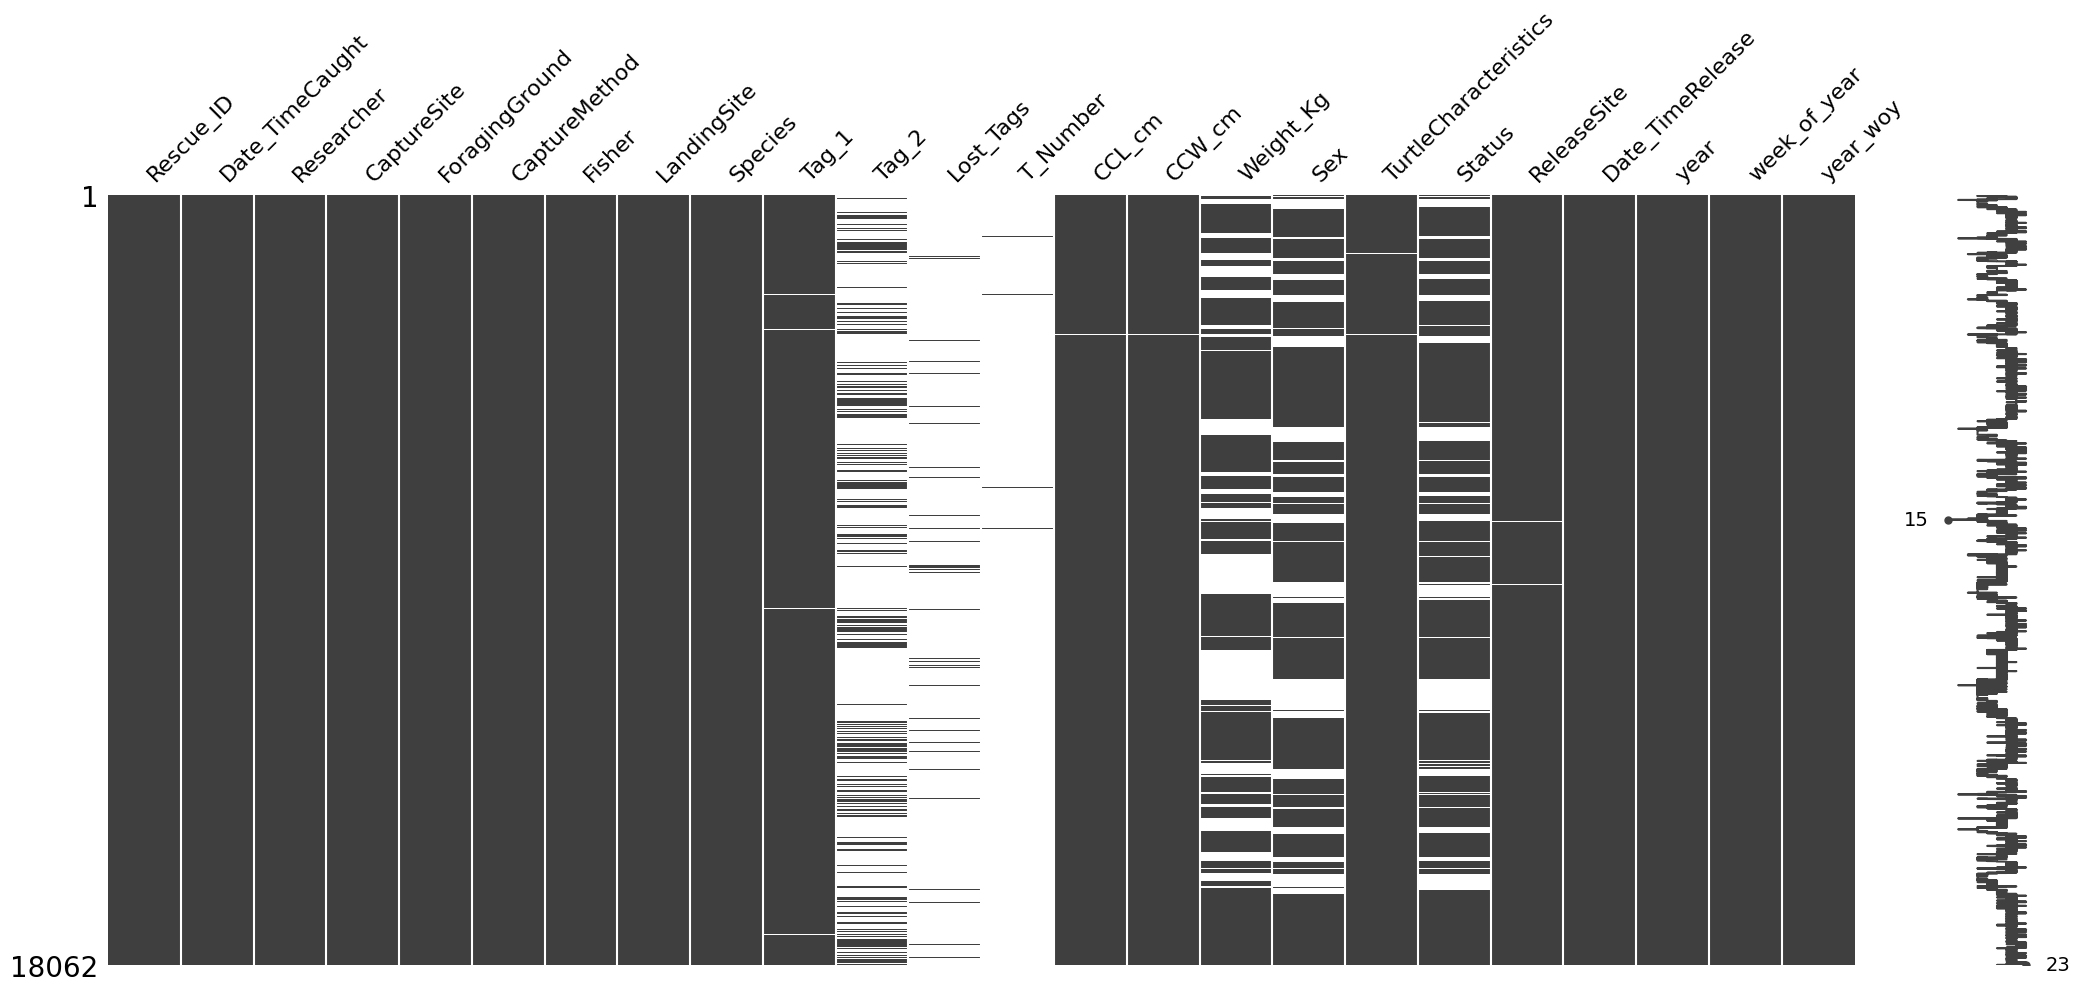

In [538]:
msno.matrix(df_train_date)

<Axes: >

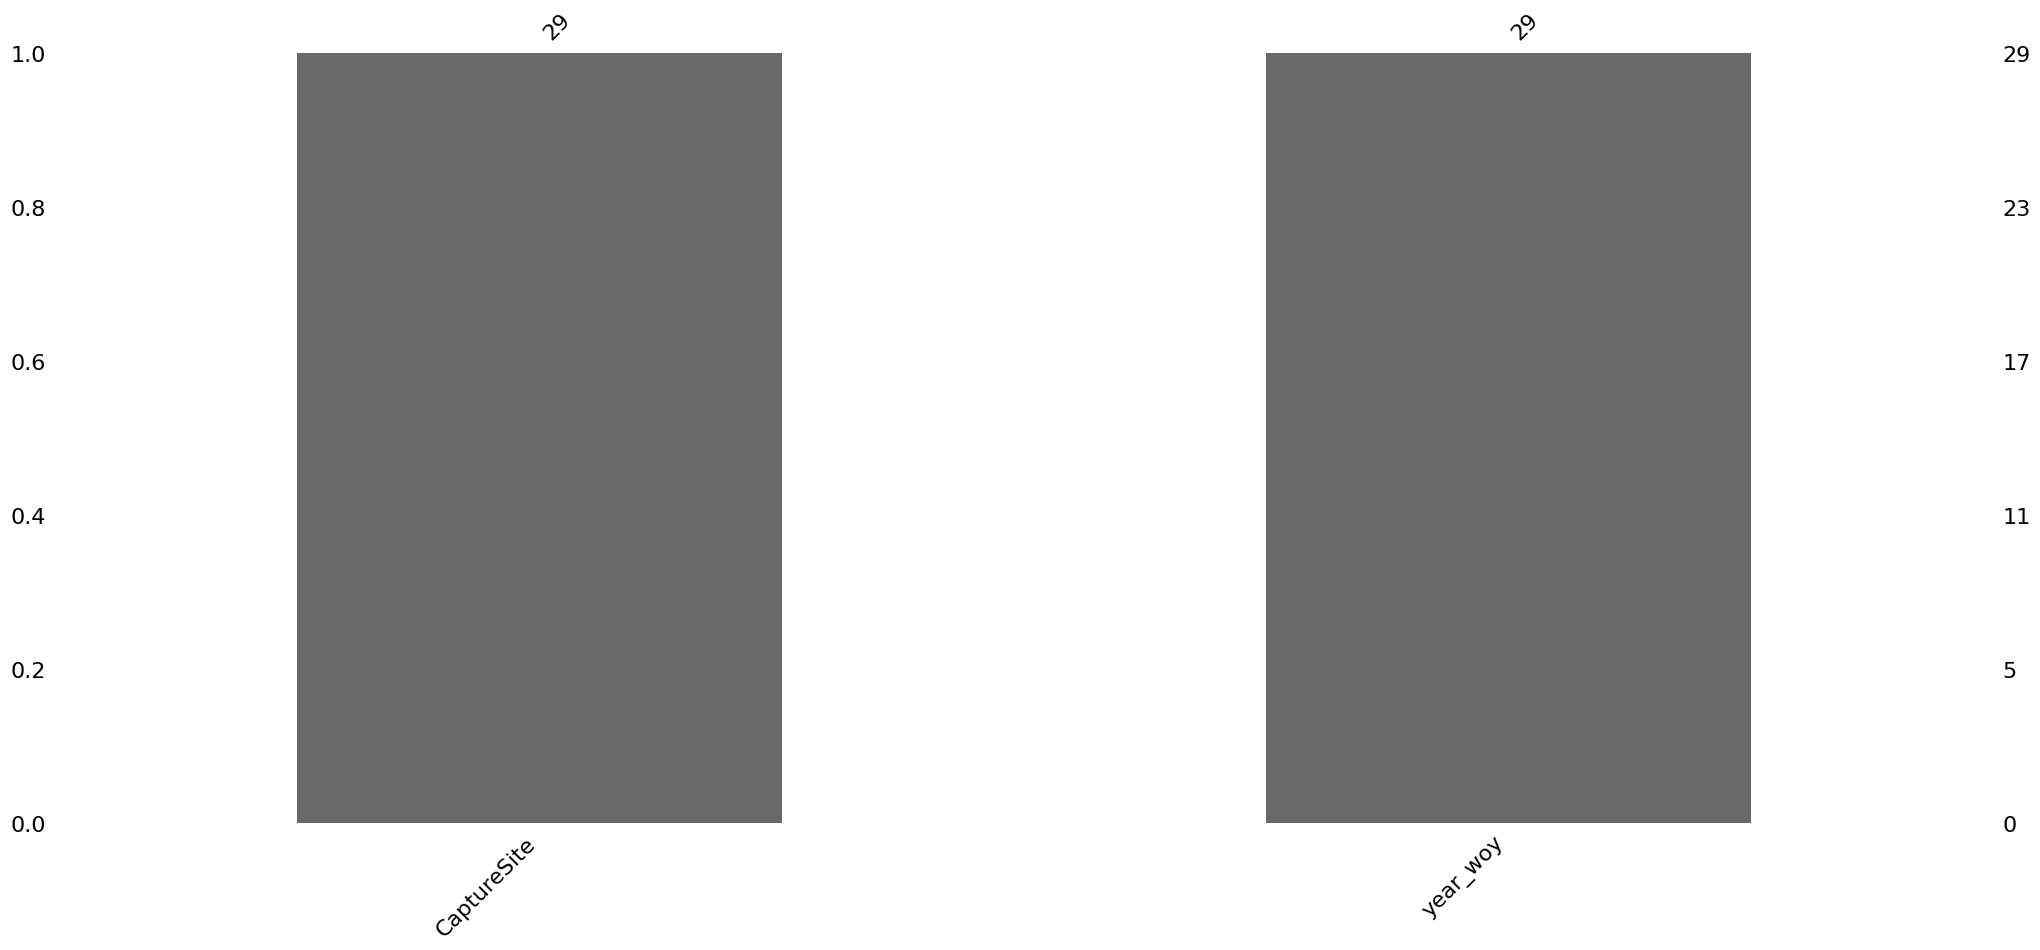

In [539]:
msno.bar(CaptureSite_min_year_woy)


In [540]:
# Maximum of Date_TimeCaught
df_train_date['Date_TimeCaught'].max()

Timestamp('2018-12-31 00:00:00')

In [541]:
# Minimum of Date_TimeCaught
df_train_date['Date_TimeCaught'].min()

Timestamp('1998-04-17 00:00:00')

In [545]:
df_train_date.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2008, 2009, 2010, 2011, 2012, 2014,
       2015, 2016, 2017, 2018, 2006, 2013, 2005, 2007, 1998, 1999],
      dtype=int32)

In [546]:
df_sample_sub.year_woy.unique()

array([201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 201913, 201914, 201915, 201916,
       201917, 201918, 201919, 201920, 201921, 201922, 201923, 201924,
       201925, 201926, 201927, 201928, 201929, 201930, 201931, 201932,
       201933, 201934, 201935, 201936, 201937, 201938, 201939, 201940,
       201941, 201942, 201943, 201944])

In [543]:
# Create a new dataframe with the range of Date_TimeCaught

range_year_woy=pd.DataFrame()
range_year_woy["Date_TimeCaught"]=pd.date_range(start=df_train_date.Date_TimeCaught.min(),end=dt(2019,10,31))

NameError: name 'train' is not defined

In [ ]:
range_year_woy.head()

,Date_TimeCaught
0,1998-04-17
1,1998-04-18
2,1998-04-19
3,1998-04-20
4,1998-04-21


In [ ]:
range_year_woy.tail()

,Date_TimeCaught
9262,2023-08-26
9263,2023-08-27
9264,2023-08-28
9265,2023-08-29
9266,2023-08-30


In [ ]:
range_year_woy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9267 entries, 0 to 9266
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date_TimeCaught  9267 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 72.5 KB


In [ ]:
# Add year, week of year and year_woy to the dataframe: range_year_woy
range_year_woy["year"]=range_year_woy.Date_TimeCaught.dt.year
range_year_woy["week_of_year"]=range_year_woy.Date_TimeCaught.dt.isocalendar().week
range_year_woy["year_woy"]=range_year_woy.year*100+range_year_woy.week_of_year
range_year_woy.drop_duplicates(["year_woy"],inplace=True)
range_year_woy

,Date_TimeCaught,year,week_of_year,year_woy
0,1998-04-17,1998,16,199816
3,1998-04-20,1998,17,199817
10,1998-04-27,1998,18,199818
17,1998-05-04,1998,19,199819
24,1998-05-11,1998,20,199820
...,...,...,...,...
9236,2023-07-31,2023,31,202331
9243,2023-08-07,2023,32,202332
9250,2023-08-14,2023,33,202333
9257,2023-08-21,2023,34,202334


In [ ]:
# Merge the dataframes: range_year_woy and CaptureSite_min_year_woy
final_data=[]
for site , year_woy in zip(CaptureSite_min_year_woy.CaptureSite.values,CaptureSite_min_year_woy.year_woy.values) :

    one_site_df=range_year_woy[range_year_woy.year_woy>=year_woy] # what means range_year_woy.year_woy>=year_woy]?  # Select the rows in the dataframe: range_year_woy where year_woy is greater than or equal to year_woy
    one_site_df["CaptureSite"]=site # Add the column: CaptureSite to the dataframe: one_site_df
    final_data.append(one_site_df) # Append the dataframe: one_site_df to the list: final_data
final_data=pd.concat(final_data)
len(final_data)

33906

In [ ]:
final_data.head()

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite
624,2000-01-01,2000,52,200052,CaptureSite_0
976,2000-12-18,2000,51,200051,CaptureSite_0
990,2001-01-01,2001,1,200101,CaptureSite_0
997,2001-01-08,2001,2,200102,CaptureSite_0
1004,2001-01-15,2001,3,200103,CaptureSite_0


In [ ]:
Target=df_train_date.groupby(["year_woy","CaptureSite"]).CaptureSite.count().rename("Capture_Number").reset_index()
final_data=final_data.merge(Target,on=["year_woy","CaptureSite"],how="left")

In [ ]:
final_data.head()

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
0,2000-01-01,2000,52,200052,CaptureSite_0,NaN
1,2000-12-18,2000,51,200051,CaptureSite_0,1.0
2,2001-01-01,2001,1,200101,CaptureSite_0,NaN
3,2001-01-08,2001,2,200102,CaptureSite_0,NaN
4,2001-01-15,2001,3,200103,CaptureSite_0,NaN


<Axes: >

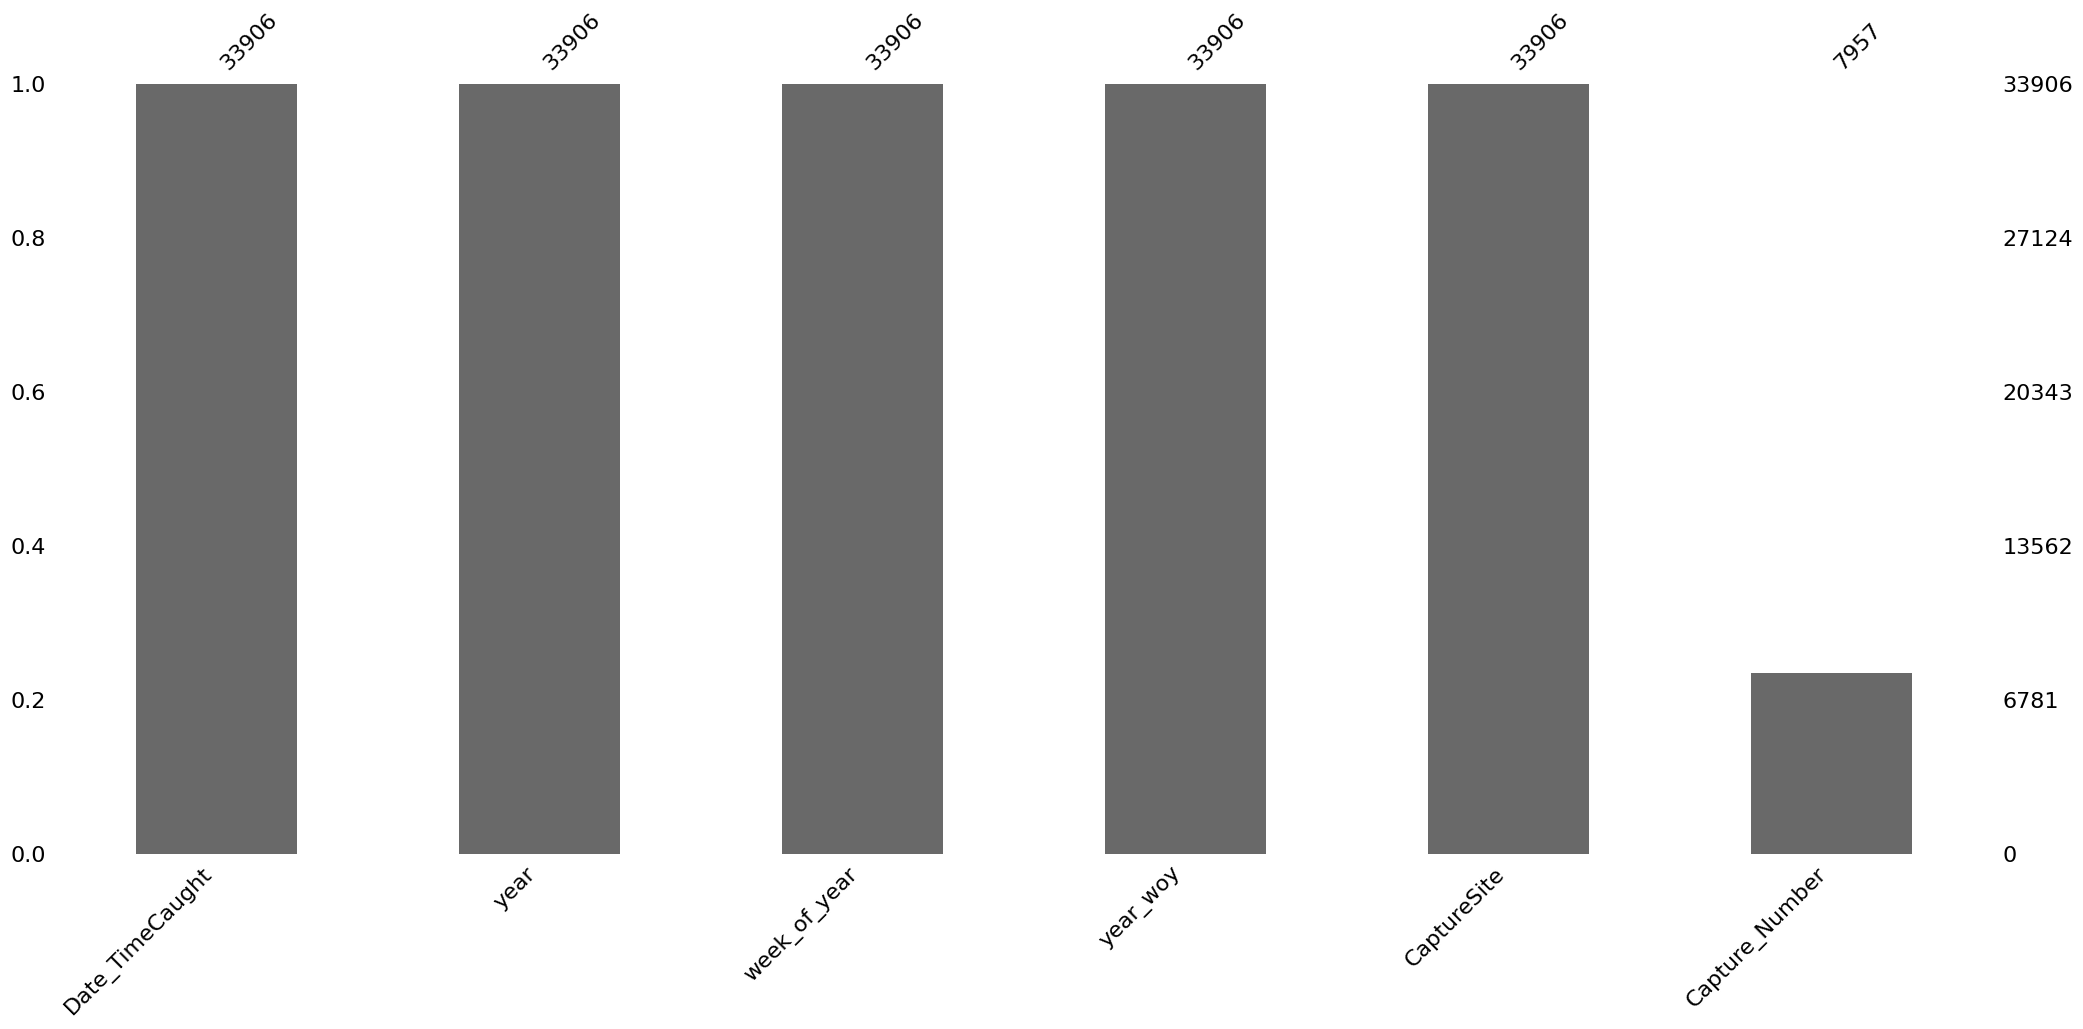

In [ ]:
# Plotting percentage of missing values per column
msno.bar(final_data)

In [ ]:
final_data.Capture_Number.fillna(0,inplace=True)

In [ ]:
final_data[(final_data.year==2008)|(final_data.year==2009)].head()

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
368,2008-01-01,2008,1,200801,CaptureSite_0,0.0
369,2008-01-07,2008,2,200802,CaptureSite_0,0.0
370,2008-01-14,2008,3,200803,CaptureSite_0,0.0
371,2008-01-21,2008,4,200804,CaptureSite_0,1.0
372,2008-01-28,2008,5,200805,CaptureSite_0,0.0


In [ ]:
final_data.drop(final_data[(final_data.year==2008)|(final_data.year==2009)].index, inplace=True)

In [ ]:
train=final_data[final_data.year<2019]
test=final_data[final_data.year==2019]

In [ ]:
test.shape

(1508, 6)

In [ ]:
train['Capture_Number'].value_counts()

Capture_Number
0.0     16535
1.0      3714
2.0      1501
3.0       783
4.0       410
5.0       234
6.0       157
7.0       142
8.0        69
9.0        56
10.0       43
11.0       25
14.0       14
13.0       14
12.0       14
15.0        5
16.0        5
17.0        2
20.0        1
18.0        1
19.0        1
23.0        1
Name: count, dtype: int64

In [ ]:
train.to_csv("final_data.csv",index=False)
test.to_csv("submission_data.csv",index=False)
del train
del test
del final_data
del Target

### Joining data

In [ ]:
df_date = pd.read_csv('final_data.csv')
df_date.head()

,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
0,2000-01-01,2000,52,200052,CaptureSite_0,0.0
1,2000-12-18,2000,51,200051,CaptureSite_0,1.0
2,2001-01-01,2001,1,200101,CaptureSite_0,0.0
3,2001-01-08,2001,2,200102,CaptureSite_0,0.0
4,2001-01-15,2001,3,200103,CaptureSite_0,0.0


In [ ]:
df_sub = pd.read_csv('submission_data.csv')
df_sub.head()


,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number
0,2019-01-01,2019,1,201901,CaptureSite_0,0.0
1,2019-01-07,2019,2,201902,CaptureSite_0,0.0
2,2019-01-14,2019,3,201903,CaptureSite_0,0.0
3,2019-01-21,2019,4,201904,CaptureSite_0,0.0
4,2019-01-28,2019,5,201905,CaptureSite_0,0.0


In [ ]:
df_date['Date_TimeCaught'] = pd.to_datetime(df_date['Date_TimeCaught'], format='%Y-%m-%d')
df_sub['Date_TimeCaught'] = pd.to_datetime(df_sub['Date_TimeCaught'], format='%Y-%m-%d')

In [ ]:
df_date['day_of_year']= pd.DatetimeIndex(df_date['Date_TimeCaught']).dayofyear
df_sub['day_of_year']= pd.DatetimeIndex(df_sub['Date_TimeCaught']).dayofyear
df_date['month'] = df_date['Date_TimeCaught'].dt.month
df_sub['month'] = df_sub['Date_TimeCaught'].dt.month
df_date['day_of_week_caught'] = pd.DatetimeIndex(df_date['Date_TimeCaught']).dayofweek
df_sub['day_of_week_caught'] = pd.DatetimeIndex(df_sub['Date_TimeCaught']).dayofweek

In [ ]:
df_date['day_of_month'] = pd.DatetimeIndex(df_date['Date_TimeCaught']).day
df_sub['day_of_month'] = pd.DatetimeIndex(df_sub['Date_TimeCaught']).day

In [ ]:
df_date.head()


,Date_TimeCaught,year,week_of_year,year_woy,CaptureSite,Capture_Number,day_of_year,month,day_of_week_caught,day_of_month
0,2000-01-01,2000,52,200052,CaptureSite_0,0.0,1,1,5,1
1,2000-12-18,2000,51,200051,CaptureSite_0,1.0,353,12,0,18
2,2001-01-01,2001,1,200101,CaptureSite_0,0.0,1,1,0,1
3,2001-01-08,2001,2,200102,CaptureSite_0,0.0,8,1,0,8
4,2001-01-15,2001,3,200103,CaptureSite_0,0.0,15,1,0,15


In [ ]:
df_date = pd.merge(df_capturesite_category, df_date, on='CaptureSite')
df_date.head()

,CaptureSite,CaptureSiteCategory,Type,Date_TimeCaught,year,week_of_year,year_woy,Capture_Number,day_of_year,month,day_of_week_caught,day_of_month
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2000-01-01,2000,52,200052,0.0,1,1,5,1
1,CaptureSite_0,CaptureSiteCategory_2,Type_1,2000-12-18,2000,51,200051,1.0,353,12,0,18
2,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001-01-01,2001,1,200101,0.0,1,1,0,1
3,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001-01-08,2001,2,200102,0.0,8,1,0,8
4,CaptureSite_0,CaptureSiteCategory_2,Type_1,2001-01-15,2001,3,200103,0.0,15,1,0,15


 Problem with the index, should be 0

In [ ]:
df_sub = pd.merge(df_capturesite_category, df_sub, on='CaptureSite')
df_sub.head()

,CaptureSite,CaptureSiteCategory,Type,Date_TimeCaught,year,week_of_year,year_woy,Capture_Number,day_of_year,month,day_of_week_caught,day_of_month
0,CaptureSite_0,CaptureSiteCategory_2,Type_1,2019-01-01,2019,1,201901,0.0,1,1,1,1
1,CaptureSite_0,CaptureSiteCategory_2,Type_1,2019-01-07,2019,2,201902,0.0,7,1,0,7
2,CaptureSite_0,CaptureSiteCategory_2,Type_1,2019-01-14,2019,3,201903,0.0,14,1,0,14
3,CaptureSite_0,CaptureSiteCategory_2,Type_1,2019-01-21,2019,4,201904,0.0,21,1,0,21
4,CaptureSite_0,CaptureSiteCategory_2,Type_1,2019-01-28,2019,5,201905,0.0,28,1,0,28


In [ ]:
# transform those categories and types to numerical values

df_date["CaptureSiteCategory"] = df_date["CaptureSiteCategory"].str.split(pat = "_", expand=True)[1]
df_date["Type"] = df_date["Type"].str.split(pat = "_", expand=True)[1]
df_sub["CaptureSiteCategory"] = df_sub["CaptureSiteCategory"].str.split(pat = "_", expand=True)[1]
df_sub["Type"] = df_sub["Type"].str.split(pat = "_", expand=True)[1]


In [ ]:
df_date["CaptureSite_id"] = df_date["CaptureSite"].str.split(pat = "_", expand=True)[1]


In [ ]:
df_sub["CaptureSite_id"] = df_sub["CaptureSite"].str.split(pat = "_", expand=True)[1]


In [ ]:
df_date.head()
df_sub.head()


,CaptureSite,CaptureSiteCategory,Type,Date_TimeCaught,year,week_of_year,year_woy,Capture_Number,day_of_year,month,day_of_week_caught,day_of_month,CaptureSite_id
0,CaptureSite_0,2,1,2019-01-01,2019,1,201901,0.0,1,1,1,1,0
1,CaptureSite_0,2,1,2019-01-07,2019,2,201902,0.0,7,1,0,7,0
2,CaptureSite_0,2,1,2019-01-14,2019,3,201903,0.0,14,1,0,14,0
3,CaptureSite_0,2,1,2019-01-21,2019,4,201904,0.0,21,1,0,21,0
4,CaptureSite_0,2,1,2019-01-28,2019,5,201905,0.0,28,1,0,28,0


Text(0.5, 0, 'number of captures')

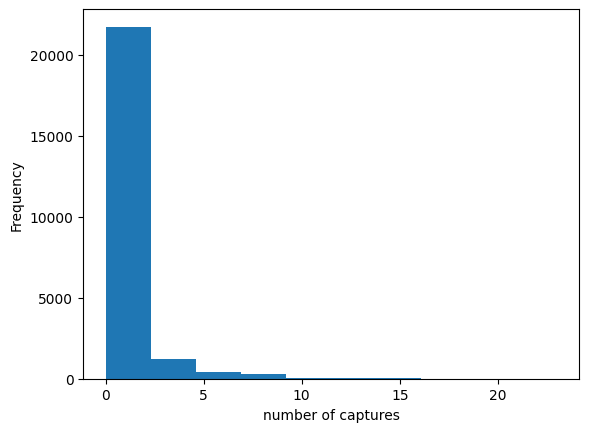

In [ ]:
ax = df_date['Capture_Number'].plot(kind='hist')
plt.xlabel('number of captures')

In [ ]:
df_date.corr()['Capture_Number'].sort_values(ascending=False)


ValueError: could not convert string to float: 'CaptureSite_0'

In [ ]:
df_date.plot(x='year', y='Capture_Number', kind='scatter', alpha=0.3)


In [ ]:
df_date.plot(x='year_woy', y='Capture_Number', kind='scatter', alpha=0.3)


## Modeling

In [ ]:
in_cols = df_date.drop(['Capture_Number','Date_TimeCaught', 'CaptureSite'], axis=1).columns
in_cols


In [ ]:
ycol = 'Capture_Number'


In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df_date[in_cols], df_date[ycol])


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:", sqrt(mean_squared_error(df_date[ycol], lm.predict(df_date[in_cols]))))


In [ ]:
plt.scatter(df_date[ycol], lm.predict(df_date[in_cols]), alpha=0.3)
plt.plot(df_date[ycol], df_date[ycol]) # A straight line - we want to be close to this
plt.xlabel('True Value')
plt.ylabel('Predicted Value')